# WhatsApp Chat Analysis

In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Data Science Community Peshawar .txt', 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

3/4/23, 15:55 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
3/4/23, 15:55 - You created group "Data Science Community Peshawar "
3/4/23, 15:57 - 💫: https://chat.whatsapp.com/CwoJArTfSEG6cd5NO3TICc
3/4/23, 16:38 - Mohsin Dost: Add kr sab ko
3/4/23, 16:45 - 💫: <Media omitted>
3/4/23, 17:31 - Mohsin Dost: <Media omitted>
3/4/23, 17:39 - 💫: <Media omitted>
3/4/23, 17:39 - 💫: <Media omitted>
3/4/23, 18:03 - Mohsin Dost: <Media omitted>
3/4/23, 18:04 - +92 318 4439061 joined using this group's invite link
3/4/23, 18:04 - +92 333 1518185 joined using this group's invite link
3/4/23, 18:04 - +92 308 9069644 joined using this group's invite link
3/4/23, 18:04 - +92 334 1958928 joined using this group's invite link
3/4/23, 18:04 - +92 308 8043112 joined using this group's invite link
3/4/23, 18:04 - +92 333 5664628 joined using this group's invite link
3/4/23, 18:05 - +92 349 9262254 joined using this

In [5]:
pattern = '\d{1,2}\/\d{1,2}\/\d{2},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'You created group "Data Science Community Peshawar "\n',
 '💫: https://chat.whatsapp.com/CwoJArTfSEG6cd5NO3TICc\n',
 'Mohsin Dost: Add kr sab ko\n',
 '💫: <Media omitted>\n',
 'Mohsin Dost: <Media omitted>\n',
 '💫: <Media omitted>\n',
 '💫: <Media omitted>\n',
 'Mohsin Dost: <Media omitted>\n',
 "+92 318 4439061 joined using this group's invite link\n",
 "+92 333 1518185 joined using this group's invite link\n",
 "+92 308 9069644 joined using this group's invite link\n",
 "+92 334 1958928 joined using this group's invite link\n",
 "+92 308 8043112 joined using this group's invite link\n",
 "+92 333 5664628 joined using this group's invite link\n",
 "+92 349 9262254 joined using this group's invite link\n",
 "+92 318 1832919 joined using this group's invite link\n",
 '+92 318 1832919 left\n',
 "+92 318 5493599 joined using this group's invite l

In [7]:
dates = re.findall(pattern, data)
dates

['3/4/23, 15:55 - ',
 '3/4/23, 15:55 - ',
 '3/4/23, 15:57 - ',
 '3/4/23, 16:38 - ',
 '3/4/23, 16:45 - ',
 '3/4/23, 17:31 - ',
 '3/4/23, 17:39 - ',
 '3/4/23, 17:39 - ',
 '3/4/23, 18:03 - ',
 '3/4/23, 18:04 - ',
 '3/4/23, 18:04 - ',
 '3/4/23, 18:04 - ',
 '3/4/23, 18:04 - ',
 '3/4/23, 18:04 - ',
 '3/4/23, 18:04 - ',
 '3/4/23, 18:05 - ',
 '3/4/23, 18:05 - ',
 '3/4/23, 18:06 - ',
 '3/4/23, 18:06 - ',
 '3/4/23, 18:06 - ',
 '3/4/23, 18:07 - ',
 '3/4/23, 18:07 - ',
 '3/4/23, 18:07 - ',
 '3/4/23, 18:07 - ',
 '3/4/23, 18:07 - ',
 '3/4/23, 18:08 - ',
 '3/4/23, 18:08 - ',
 '3/4/23, 18:08 - ',
 '3/4/23, 18:08 - ',
 '3/4/23, 18:09 - ',
 '3/4/23, 18:10 - ',
 '3/4/23, 18:11 - ',
 '3/4/23, 18:11 - ',
 '3/4/23, 18:11 - ',
 '3/4/23, 18:13 - ',
 '3/4/23, 18:14 - ',
 '3/4/23, 18:14 - ',
 '3/4/23, 18:15 - ',
 '3/4/23, 18:18 - ',
 '3/4/23, 18:18 - ',
 '3/4/23, 18:19 - ',
 '3/4/23, 18:23 - ',
 '3/4/23, 18:27 - ',
 '3/4/23, 18:29 - ',
 '3/4/23, 18:30 - ',
 '3/4/23, 18:31 - ',
 '3/4/23, 18:34 - ',
 '3/4/23, 18:

In [8]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')


df.rename(columns={'message_date': 'date'}, inplace=True)

In [9]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-04-03 15:55:00
1,"You created group ""Data Science Community Pesh...",2023-04-03 15:55:00
2,💫: https://chat.whatsapp.com/CwoJArTfSEG6cd5NO...,2023-04-03 15:57:00
3,Mohsin Dost: Add kr sab ko\n,2023-04-03 16:38:00
4,💫: <Media omitted>\n,2023-04-03 16:45:00


In [10]:
users = []
messages = []
for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

df['user'] = users
df['message'] = messages

In [11]:
df.head()

,user_message,date,user,message
0,Messages and calls are end-to-end encrypted. N...,2023-04-03 15:55:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,"You created group ""Data Science Community Pesh...",2023-04-03 15:55:00,group_notification,"You created group ""Data Science Community Pesh..."
2,💫: https://chat.whatsapp.com/CwoJArTfSEG6cd5NO...,2023-04-03 15:57:00,💫,https://chat.whatsapp.com/CwoJArTfSEG6cd5NO3TI...
3,Mohsin Dost: Add kr sab ko\n,2023-04-03 16:38:00,Mohsin Dost,Add kr sab ko\n
4,💫: <Media omitted>\n,2023-04-03 16:45:00,💫,<Media omitted>\n


In [12]:
df.drop(columns=['user_message'], inplace=True)

In [13]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-04-03 15:55:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-04-03,2023,4,April,3,Monday,15,55
1,2023-04-03 15:55:00,group_notification,"You created group ""Data Science Community Pesh...",2023-04-03,2023,4,April,3,Monday,15,55
2,2023-04-03 15:57:00,💫,https://chat.whatsapp.com/CwoJArTfSEG6cd5NO3TI...,2023-04-03,2023,4,April,3,Monday,15,57
3,2023-04-03 16:38:00,Mohsin Dost,Add kr sab ko\n,2023-04-03,2023,4,April,3,Monday,16,38
4,2023-04-03 16:45:00,💫,<Media omitted>\n,2023-04-03,2023,4,April,3,Monday,16,45


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Malak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Malak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


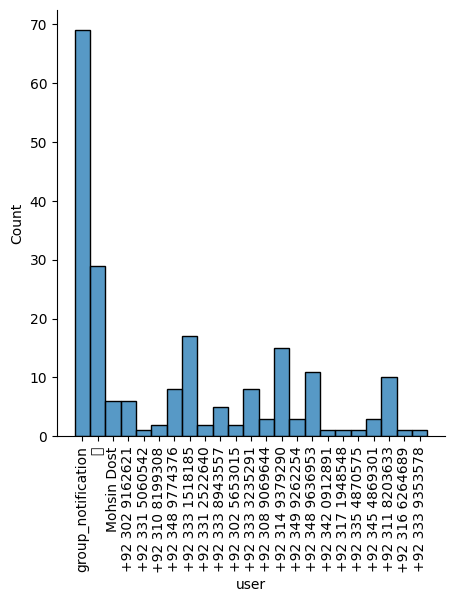

In [15]:
sns.displot(df['user'])
plt.xticks(rotation='vertical')
plt.show()

In [16]:
df = df.drop(df[(df['user'] == 'group_notification')].index)


In [17]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
2,2023-04-03 15:57:00,💫,https://chat.whatsapp.com/CwoJArTfSEG6cd5NO3TI...,2023-04-03,2023,4,April,3,Monday,15,57
3,2023-04-03 16:38:00,Mohsin Dost,Add kr sab ko\n,2023-04-03,2023,4,April,3,Monday,16,38
4,2023-04-03 16:45:00,💫,<Media omitted>\n,2023-04-03,2023,4,April,3,Monday,16,45
5,2023-04-03 17:31:00,Mohsin Dost,<Media omitted>\n,2023-04-03,2023,4,April,3,Monday,17,31
6,2023-04-03 17:39:00,💫,<Media omitted>\n,2023-04-03,2023,4,April,3,Monday,17,39


In [19]:
import emoji
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [18]:
# period = []
# for hour in df[['day_name', 'hour']]['hour']:
#         if hour == 23:
#             period.append(str(hour) + "-" + str('00'))
#         elif hour == 0:
#             period.append(str('00') + "-" + str(hour + 1))
#         else:
#             period.append(str(hour) + "-" + str(hour + 1))

# df['period'] = period

# return df